In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

%matplotlib inline

In [3]:
df = pd.read_csv("results.csv", sep=";")
df.head()

,"send,kb",produced,"produced,gb",consumed,"consumed,gb",name
0,1,3120000,3.12,3120000,3.12,kafka
1,10,840000,8.40,840000,8.40,kafka
2,100,423000,42.30,423000,42.30,kafka
3,1000,55600,55.60,26600,26.60,kafka
4,10000,7400,74.00,2500,25.00,kafka


In [4]:
set(df["name"])

{'artemis', 'kafka', 'rabbit', 'redis'}

In [5]:
df.head(6)

,"send,kb",produced,"produced,gb",consumed,"consumed,gb",name
0,1,3120000,3.12,3120000,3.12,kafka
1,10,840000,8.40,840000,8.40,kafka
2,100,423000,42.30,423000,42.30,kafka
3,1000,55600,55.60,26600,26.60,kafka
4,10000,7400,74.00,2500,25.00,kafka
5,1,336000,0.34,336000,0.34,artemis


In [6]:
def get_produced(name):
    return list(df[df["name"] == name]["produced,gb"])

In [7]:
xlabels = [str(val) + " kb" for val in df["send,kb"][:5]]
xlabels

['1 kb', '10 kb', '100 kb', '1000 kb', '10000 kb']

In [25]:
names = ['kafka', 'artemis', 'redis', 'rabbit']

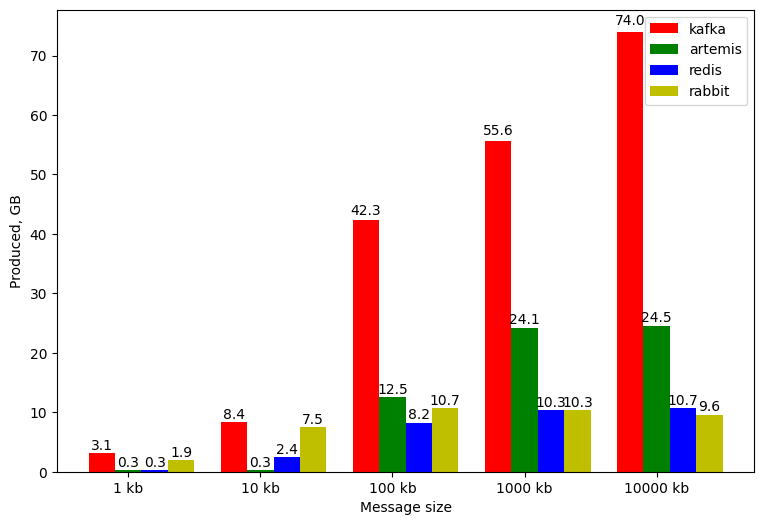

In [38]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, get_produced(names[0]), width, color='r')
rects2 = ax.bar(ind+width, get_produced(names[1]), width, color='g')
rects3 = ax.bar(ind+width*2, get_produced(names[2]), width, color='b')
rects4 = ax.bar(ind+width*3, get_produced(names[3]), width, color='y')

ax.set_ylabel('Produced, GB')
ax.set_xlabel('Message size')
ax.set_xticks(ind+width)
ax.set_xticklabels(xlabels)
ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), names)

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*h, '%.1f'%h, ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

In [9]:
def get_consumed(name):
    return list(df[df["name"] == name]["consumed,gb"])

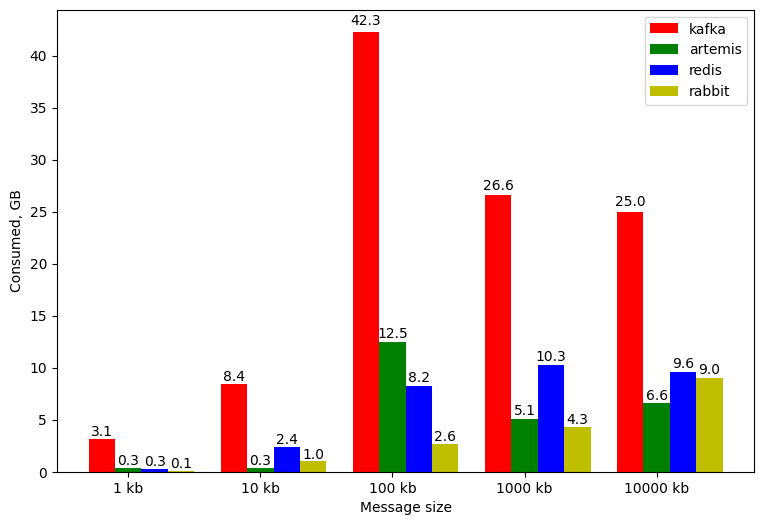

In [39]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, get_consumed(names[0]), width, color='r')
rects2 = ax.bar(ind+width, get_consumed(names[1]), width, color='g')
rects3 = ax.bar(ind+width*2, get_consumed(names[2]), width, color='b')
rects4 = ax.bar(ind+width*3, get_consumed(names[3]), width, color='y')

ax.set_ylabel('Consumed, GB')
ax.set_xlabel('Message size')
ax.set_xticks(ind+width)
ax.set_xticklabels(xlabels)
ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), names)

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*h, '%.1f'%h, ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

In [34]:
processed = df["consumed,gb"]/df["produced,gb"]
df["part_consumed"] = processed

In [36]:
df

,"send,kb",produced,"produced,gb",consumed,"consumed,gb",name,part_consumed
0,1,3120000,3.12,3120000,3.12,kafka,1.000000
1,10,840000,8.40,840000,8.40,kafka,1.000000
2,100,423000,42.30,423000,42.30,kafka,1.000000
3,1000,55600,55.60,26600,26.60,kafka,0.478417
4,10000,7400,74.00,2500,25.00,kafka,0.337838
5,1,336000,0.34,336000,0.34,artemis,1.000000
6,10,336000,0.34,336000,0.34,artemis,1.000000
7,100,125000,12.50,125000,12.50,artemis,1.000000
8,1000,24100,24.10,5100,5.10,artemis,0.211618
9,10000,2450,24.50,660,6.60,artemis,0.269388


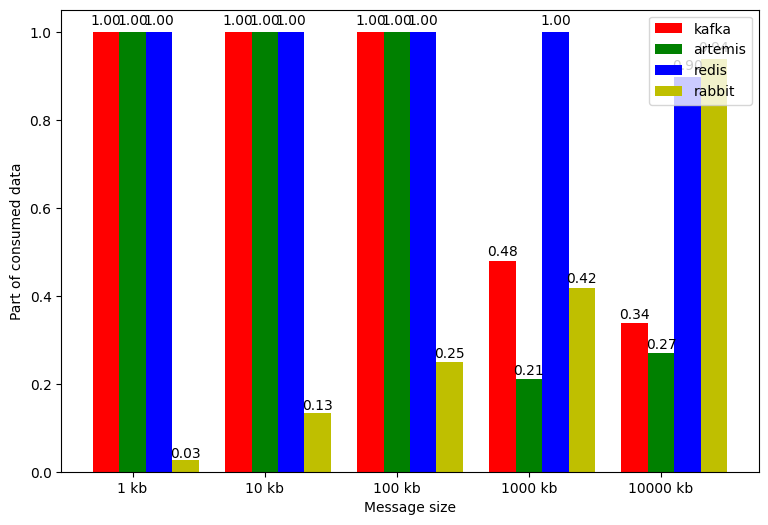

In [40]:
zN = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, processed[:5], width, color='r')
rects2 = ax.bar(ind+width, processed[5:10], width, color='g')
rects3 = ax.bar(ind+width*2, processed[10:15], width, color='b')
rects4 = ax.bar(ind+width*3, processed[15:], width, color='y')

ax.set_ylabel('Part of consumed data')
ax.set_xlabel('Message size')
ax.set_xticks(ind+width)
ax.set_xticklabels(xlabels)
ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), names)

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*h, '%.2f'%h, ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

In [40]:
def read_file(name):
    lines = []
    with open(name, 'r') as f:
        for line in f:
            lines.append(line.rstrip())
    return lines

In [41]:
format = '%Y-%m-%d %H:%M:%S'

def get_diff_from_lines(lines):
    sent = []
    processed = []
    diff = []
    for line in lines:
        if "Sent" in line or "Processed" in line:
            t = line.split(' ')
            t_str = t[0] + " " + t[1].split(".")[0]
            t_val = datetime.strptime(t_str, format)
            if "Sent" in line:
                sent.append(int(t[-2].replace("'", "")))
            if "Processed" in line:
                processed.append(int(t[-2].replace("'", "")))
            if len(sent) > 0:
                curr_diff = sent[-1]
                if len(processed) > 0:
                    curr_diff = sent[-1] - processed[-1]
                diff.append((t_val, curr_diff))

    diff_target = []
    start = diff[0][0]
    for t_val, diff_val in diff:
        diff_target.append(((t_val - start).total_seconds(), diff_val))
    return diff_target

In [42]:
diff_target_kafka_1mb = get_diff_from_lines(read_file('kafka-1mb.txt'))
diff_target_kafka_1mb[:5]

[(0.0, 200), (1.0, 0), (2.0, 200), (3.0, 0), (3.0, 200)]

In [53]:
def plot_diff(diff_target):
    seconds = list(list(zip(*diff_target))[0])
    diffs = list(list(zip(*diff_target))[1])
    plt.plot(seconds, diffs)
    plt.axvline(x=300, color="r")
    plt.plot()
    plt.ylabel("Difference between producer and consumer")
    plt.xlabel("Seconds")
    plt.xticks(range(0, int(max(seconds)), 50))
    plt.grid()
    plt.show()

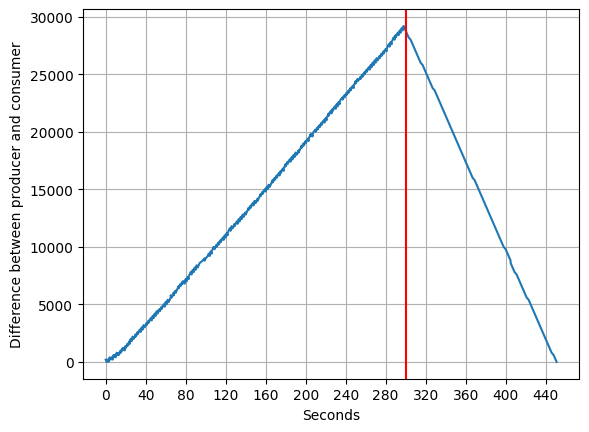

In [50]:
plot_diff(diff_target_kafka_1mb)

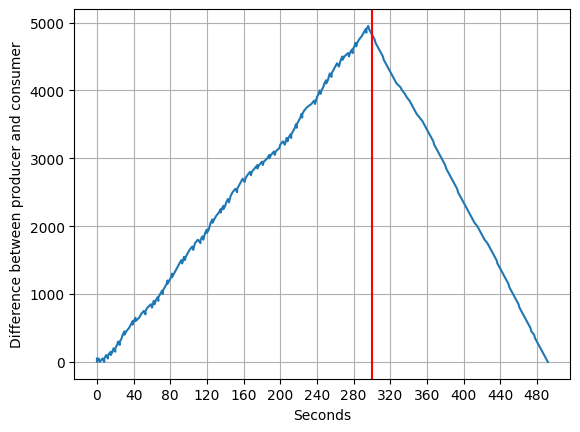

In [51]:
plot_diff(get_diff_from_lines(read_file('kafka-10mb.txt')))

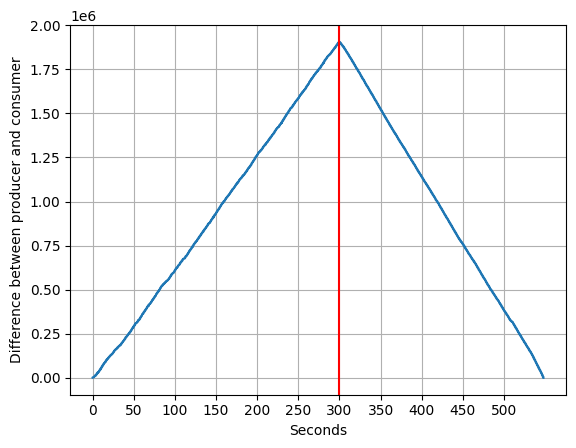

In [54]:
plot_diff(get_diff_from_lines(read_file('rabbit-1kb.txt')))